In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.utils.np_utils import to_categorical

In [2]:
# Sigmoid function and the derivative sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# Normalizing the array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on epoch 0 is 50.450169183801684 %
Accuracy on epoch 1 is 90.0 %
Accuracy on epoch 2 is 50.0 %
Accuracy on epoch 3 is 90.0 %
Accuracy on epoch 4 is 66.03733333333332 %
Accuracy on epoch 5 is 74.06099999999999 %
Accuracy on epoch 6 is 90.0 %
Accuracy on epoch 7 is 50.0 %
Accuracy on epoch 8 is 57.95133333333333 %
Accuracy on epoch 9 is 81.95033333333333 %
Accuracy on epoch 10 is 90.0 %
Accuracy on epoch 11 is 90.0 %
Accuracy on epoch 12 is 50.02066666666667 %
Accuracy on epoch 13 is 90.0 %
Accuracy on epoch 14 is 90.0 %
Accuracy on epoch 15 is 87.514237759135 %
Accuracy on epoch 16 is 68.68750006050226 %
Accuracy on epoch 17 is 89.95301334796554 %
Accuracy on epoch 18 is 58.206218348440665 %
Accuracy on epoch 19 is 89.54901735770962 %
Accuracy on epoch 20 is 47.755623885237384 %
Accuracy on epoch 21 is 90.0 %
Accuracy on epoch 22 is 90.04666666666667 %
Accuracy on epoch 23 is 61.846833333333336 %
Accuracy on epoch 24 is 62.40012407546056 %
Accuracy on epoch 25 is 89.19516637718

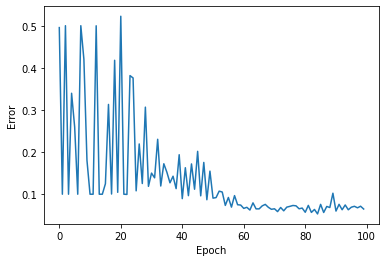

Training Accuracy 93.51%
Histogram of the accuracy development over each epoch


In [3]:
input_size = 784
hidden_nodes = 30
output_size = 10
epochs = 100
train_test_split = 0.85
#learning rate
n = 0.07

errors = []

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshaping the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot-encoding for the target values
# Saving original values for later
y_test_original = y_test
y_train_original = y_train

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.flatten().reshape(60000, 784)


# Giving weights
w0 = 2*np.random.random((input_size, hidden_nodes)) - 1 # Input layer
w1 = 2*np.random.random((hidden_nodes, output_size)) - 1 # Hidden layer


for i in range(epochs):
    # Feed-forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    #if (i % 10000 == 0):
    print("Accuracy on epoch", i, "is" ,accuracy, "%")

# Plotting the accuracy chart
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")
print("Histogram of the accuracy development over each epoch")

In [4]:
# Validating the results with the test set
X_test = X_test.flatten().reshape(10000, 784)
layer0 = X_test

layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100


print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 93.36%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
